# Numpy y Matplotlib

El uso de librerías es cada vez más necesario. En esta clase se introducirá el módulo Numpy y Matplotlib. (Tomaremos un poco del módulo de scipy)

## Numpy vs Listas

Si ya tenemos listas para trabajar con vectores y matrices ¿Para qué se necesita numpy?. Numpy es una librería que permite trabajar con r-tensores y una gran cantidad de funciones matemáticas avanzadas.

Haremos una "batalla" Listas vs Arrays de Numpy.

### Espacio en Memoria
Las listas suman el espacio en memoria dependiendo del objeto que se tenga y la cantidad de los mismos.

In [1]:
import numpy as np
import sys

L = range(1000)
NA = np.arange(1000)

# Cuanto espacio en memoria ocupan
print('Espacio ocupado por la lista: ', sys.getsizeof(1) * len(L))
print('Espacio ocupado por el array de Numpy: ', sys.getsizeof(NA))

Espacio ocupado por la lista:  28000
Espacio ocupado por el array de Numpy:  8096


Con esto claramente se ve que las listas ocupan un espacio mucho más grande para almacenar números.

### Tiempo de Ejecución

Importamos el módulo time y vemos en cuanto tiempo realizan la suma de dos vectores.

In [2]:
import time

# listas y arreglos
length = 1000000
L1 = range(length)
L2 = range(length)
V1 = np.arange(length)
V2 = np.arange(length)

# Suma de listas
startL = time.time()
SumaL = [i + j for i,j in zip(L1,L2)]
endL = time.time()
print('Tiempo Listas: ', (endL - startL)*1000, 'ms')

# Suma numpy
startN = time.time()
sumaN = V1 + V2
endN = time.time()
print('Tiempo Arreglos Numpy: ', (endN - startN)*1000, 'ms')

Tiempo Listas:  120.92375755310059 ms
Tiempo Arreglos Numpy:  8.218765258789062 ms


Queda claro, goleada a favor de numpy (y eso que ni hemos empezado).

## Álgebra lineal con Numpy

Un arreglo (vector o matriz) tienen propiedades que tiene un vector en un espacio vectorial.

In [3]:
# Vectores
a = np.array([1,2,3,4])
b = np.array([4,3,2,1])

# Matrices
M1 = np.eye(3)
M2 = np.array([[1,2,3],[0,4,5],[0,0,6]])

# Matrices de Pauli
P1 = np.array([[0,1],[1,0]])
P2 = np.array([[0,-1j],[1j,0]])
P3 = np.array([[1,0],[0,-1]])

# Suma y resta
print('Suma: \n', a + b)
print('Resta: \n', a - b)



# Producto de matrices 
print('Multiplicación: \n', np.matmul(P1,P2))


# Producto de Kronecker
print('Producto de Kronecker: \n', np.kron(M1,P2))

# Determinantes, traza y transpuestas
print('Determinante: ', np.linalg.det(M2))
print('Traza: ', np.trace(M1))
M2t = np.transpose(M2)
print('Transpuesta: \n', M2t)

P2t = np.transpose(P2)
print('Conjugada: \n', np.conjugate(P2t))

Suma: 
 [5 5 5 5]
Resta: 
 [-3 -1  1  3]
Multiplicación: 
 [[0.+1.j 0.+0.j]
 [0.+0.j 0.-1.j]]
Producto de Kronecker: 
 [[0.+0.j 0.-1.j 0.+0.j 0.-0.j 0.+0.j 0.-0.j]
 [0.+1.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.-0.j 0.+0.j 0.-1.j 0.+0.j 0.-0.j]
 [0.+0.j 0.+0.j 0.+1.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.-0.j 0.+0.j 0.-0.j 0.+0.j 0.-1.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+1.j 0.+0.j]]
Determinante:  23.999999999999993
Traza:  3.0
Transpuesta: 
 [[1 0 0]
 [2 4 0]
 [3 5 6]]
Conjugada: 
 [[ 0.-0.j  0.-1.j]
 [-0.+1.j  0.-0.j]]


### Eigenvalores y eigenvectores

Para encontrar los Valores y Vectores propios de un operador, se utiliza el método *eig* del submódulo **linalg**. Esto nos devuelve un arreglo con los valores propios y otro con los vectores propios normalizados ($|| v || = 1$).

In [4]:
np.linalg.eig(M2)

(array([1., 4., 6.]), array([[1.        , 0.5547002 , 0.51084069],
        [0.        , 0.83205029, 0.79818857],
        [0.        , 0.        , 0.31927543]]))

La positividad se puede determinar en base a los valores propios de la matriz (solo para matrices Hermiticas, recordando que los valores propios de dichas matrices son reales).

In [5]:
# Matriz Hermítica
T = np.array([[3,2 - 1j,-5j],[2 + 1j, 0, 9 - 5j],[5j, 9 + 5j, 6]])

print('Valores propios de matriz Hermítica: \n', np.linalg.eig(T))

Valores propios de matriz Hermítica: 
 (array([15.82546199+2.69678293e-16j,  1.23814458-1.09658896e-16j,
       -8.06360657+7.28159022e-16j]), array([[ 0.04949457-0.37359764j,  0.90810684+0.j        ,
        -0.0183575 -0.18160414j],
       [ 0.45850691-0.28222304j, -0.12560003-0.32655839j,
         0.76661973+0.j        ],
       [ 0.75372187+0.j        , -0.10550335-0.2044389j ,
        -0.55516331-0.26602786j]]))


### Sistemas de Ecuaciones lineales

Para forzar el programa, tomamos un sistema $4x4$.

Resolver: 
$$\left(
\begin{array}{cc}
  3 & 6 & -2 & 9 \\
  -5 & 4 & 5 & -6 \\
  -3 & 8 & 2 & -3 \\
  -4 & 10 & 3 & 9
\end{array}
\right)
\left(
\begin{array}{c}
  x \\
  y \\
  z \\
  u
\end{array}
\right)
=
\left(
\begin{array}{c}
  6 \\
  5 \\
  3 \\
  9
\end{array}
\right)$$

In [ ]:
np.linalg.solve(np.array([[3, 6, -2, 9],[-5, 4, 5, -6],[-3, 8, 2, -3],[-4, 10, 3, 9]]), np.array([[6],[5],[3],[9]]))

array([[2.        ],
       [0.5       ],
       [3.        ],
       [0.33333333]])

Les recomiendo que vayan a ver todas las rutinas de linalg (linear algebra) de numpy: 

[Documentación de álgebra lineal de numpy](https://numpy.org/doc/stable/reference/routines.linalg.html)

Y también que vayan a revisar el montón de rutinas que tiene implementadas numpy: 

[Documentación de un chingazal de rutinas de numpy](https://numpy.org/doc/stable/reference/routines.html)

**Vale la pena echarle un vistazo a todo lo que tiene numpy para estar enterados de qué cosas ya están implementadas y  no perder el tiempo intentando implemetar algo que ya está y mucho más óptimo.**

Luego de ver un poco de las maravillas de numpy.

## Scipy
Luego de iniciar un poco con numpy, introduciremos scipy para poder hacer gráficas de problemas mas interesantes :3 

### Regresión lineal:
Para los que han estudiado un poco de análisis de datos, sabrán que una forma de hacer un ajuste lineal es a partir del método de mínimos cuadrados (el cual brinda una buan aproximación), ahora se utilizará la librería scipy ([Documentación](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.linregress.html)).

In [7]:
from scipy import stats

x = np.random.random(10)
y = np.random.random(10)

# El método 'linregress' devuelve 5 valores:
#     slope (pendiente)
#     intercept (intercepto de la recta)
#     rvalue ()
#     pvalue (Sepa putas)
#     stderr (desviación estandar)

slope, intercept, rvalue, pvalue, stderr = stats.linregress(x,y)

print('y = ', slope,'x + ', intercept)
print('R^2: ', rvalue**2)

y =  0.4100829883818371 x +  0.5032223649217717
R^2:  0.08739874265490655


### Métodos numéricos
No entraremos en detalle con esto, pero comparados con el método de Euler, los métodos dados en *scipy* utilizan Runge Kutta y su eficiencia es mucho mayor que la del método de Euler, así como su utilidad.

## Matplotlib
El preciado momento en el que vamos a poder plasmar los datos obtenidos y graficarlos.

Esta librería provee varias formas de graficación:


1.   Diagramas de línea
2.   Diagrama de Barras
3.   Histogramas
4.   Dispersión
5.   Entre otros...



Iniciando con el ploteo de funciones simples, tales como: seno, coseno, x ,$x^2$,  etc.

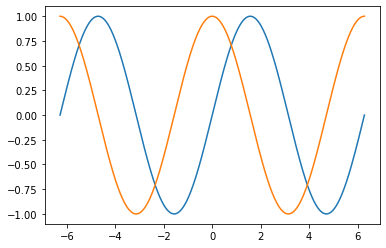

In [16]:
# módulo de graficación en 2D
import matplotlib.pyplot as plt

# Intervalo a plotear
x = np.linspace(-2*np.pi,2*np.pi, 1000)

plt.plot(x,np.sin(x))
plt.plot(x,np.cos(x))
plt.show()

Para customisar la curva, se tienen opciones en el método **plot**, tales como  el color o el estilo de la curva. Para customisar más la gráfica con labels, leyenda, etc. 

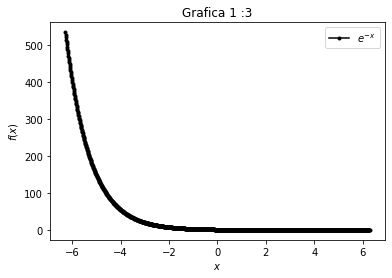

In [18]:
# Función a plotear
f = lambda x: np.exp(-x)


# Se plotea en verde, línea punteada
plt.plot(x,f(x),'.-k',label=r'$e^{-x}$')
# Leyenda
plt.legend()
# Labels en los Ejes
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
# titulo
plt.title('Grafica 1 :3')
# se muestra y guarda (primero se guarda)
#plt.savefig('grafica.pdf')
plt.show()

### Varios Plots en una sola gráfica
Para tener varias curvas en una sola gráfica no se muestra la grafica luego del primer plot, se muestra luego de la ultima curva ploteada.

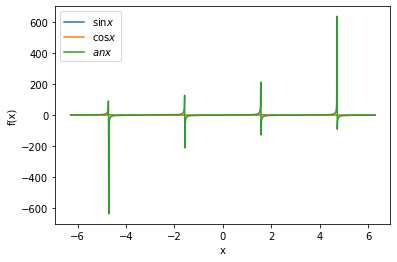

In [21]:
# Se crean varios plots
f1 = lambda x: np.sin(x)
f2 = lambda x: np.cos(x)
f3 = lambda x: np.tan(x)

# Se plotean
plt.plot(x,f1(x),label='$\sin{x}$')
plt.plot(x,f2(x),label='$\cos{x}$')
plt.plot(x,f3(x),label='$\tan{x}$')

# Leyendas y labels
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()

# Fijamos los ejes en ciertos valores
plt.xlim(-np.pi,np.pi)
plt.ylim(-3,3)

# Se muestra
plt.show()

Para tener varias graficas separadas en una sola imagen, se utilizan los subplots. Esto se verá la siguiente clase.

### Regresión Lineal
Para datos aleatorios, se aplica lo visto en la regresión lineal y se plotea la recta que más se acople a los datos.

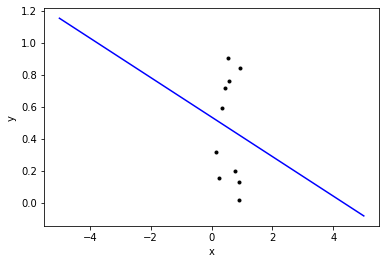

In [23]:
# Datos random
x = np.random.random(10)
y = np.random.random(10)

# ploteo de los datos
plt.plot(x,y, '.k')

# Se realiza la regresión
slope, intercept, rvalue, pvalue, stderr = stats.linregress(x,y)

# Se crea la recta de la regresión
f = lambda x: slope*x + intercept
t = np.linspace(-5,5,1000)

plt.plot(t,f(t),'-b')

# Customs
plt.xlabel('x')
plt.ylabel('y')

plt.show()

## Ejemplos de motivación

### Polinomios de Legendre y Hermite
Tomando los polinomios de Legendre, se grafican los primeros $n$ polinomios. Tomar como ejemplo para desarrollar un programa que grafique los primeros $n$ polinomios de Hermite. \

### Figuras de Lissajous
Las figuras de Lissajous se generar al tener dos movimientos armónicos simples perpendiculares. Dados $\frac{\omega _x}{\omega _y} = q, \, q\in \mathbb{Q}$ y $\delta$ desfase. De esto:

$$x = \sin{(\omega _x t + \delta)} \quad \quad y = \sin{\omega _y t}$$

Graficandolo:

Frecuencia Angular en x: 3
Frecuencia Angular en y: 2
Desfase: 0


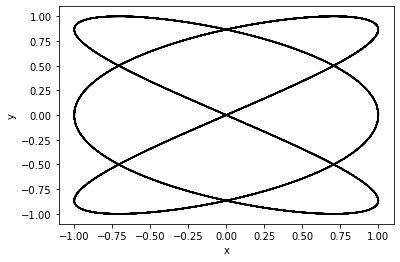

In [24]:
# Valores
a = int(input('Frecuencia Angular en x: '))
b = int(input('Frecuencia Angular en y: '))
d = float(input('Desfase: '))

# MAS
x = lambda t: np.sin(a*t + d)
y = lambda t: np.sin(b*t)

# Valores de 't'
t = np.linspace(-20,20,1000)

# plot
plt.plot(x(t),y(t), '-k')
plt.xlabel('x')
plt.ylabel('y')


plt.show()